To what extent does the socio-economic conditions of households determine their cigarette consumption behavior?



# Socio-Economic Conditions 


1.   -Education Status
2.   -Number of people in the household
3. -Number of people in the household and poverty risk
4. -cigarette prices




-


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
### Education status
#loading the data
#read the file.


In [4]:

df = pd.read_excel('/content/drive/My Drive/cs210gulnihal/hane halkına göre gelirler.xlsx')
df

,Gelir tipleri:Hanehalkı Kullanılabilir Gelire Göre ve Yüzde 20'lik gruplar,year,percentage
0,1,2006,"5,75"
1,1,2007,"6,38"
2,1,2008,"6,39"
3,1,2009,"6,18"
4,1,2010,"6,5"
...,...,...,...
80,5,2018,"46,76"
81,5,2019,"45,42"
82,5,2020,"46,51"
83,5,2021,"45,9"


In [5]:
df.dtypes

Gelir tipleri:Hanehalkı Kullanılabilir Gelire Göre ve Yüzde 20'lik gruplar     int64
year                                                                           int64
percentage                                                                    object
dtype: object

In [6]:
df['percentage'] = df['percentage'].map(lambda x: x.replace(',', '.') if isinstance(x, str) and ',' in x else x).astype(float)
data_types = df.dtypes
print(data_types)

Gelir tipleri:Hanehalkı Kullanılabilir Gelire Göre ve Yüzde 20'lik gruplar      int64
year                                                                            int64
percentage                                                                    float64
dtype: object


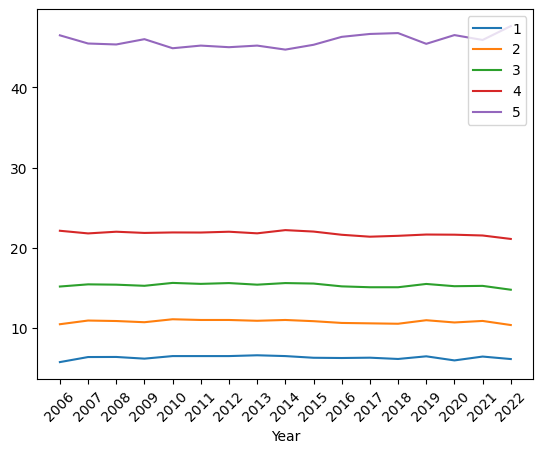

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Grouping the data by type
grouped_data = df.groupby("Gelir tipleri:Hanehalkı Kullanılabilir Gelire Göre ve Yüzde 20'lik gruplar")

# Plotting the time series data for each type
for group_name, group_data in grouped_data:
    plt.plot(group_data['year'].astype(str), group_data['percentage'], label=str(group_name))


plt.xlabel('Year')
plt.xticks(rotation=45)

plt.legend()


plt.show()

In [11]:
df_tutun_toplam_harcama = pd.read_excel('/content/drive/My Drive/cs210gulnihal/egitim_tutun_durum.xlsx')
df_tutun_toplam_harcama

,Hanehalkı Sorumlusunun Eğitim Durumu,Yıl,Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)
0,1. (Okur Yazar Değil Veya Bir Okul Bitirmedi),2002,36029428
1,1. (Okur Yazar Değil Veya Bir Okul Bitirmedi),2003,38741726
2,1. (Okur Yazar Değil Veya Bir Okul Bitirmedi),2004,46980943
3,1. (Okur Yazar Değil Veya Bir Okul Bitirmedi),2005,62588599
4,1. (Okur Yazar Değil Veya Bir Okul Bitirmedi),2006,66517512
...,...,...,...
103,6. (Yüksek Lisans Veya Doktora),2015,37381887
104,6. (Yüksek Lisans Veya Doktora),2016,36883955
105,6. (Yüksek Lisans Veya Doktora),2017,37228243
106,6. (Yüksek Lisans Veya Doktora),2018,33975778


In [12]:
df_tutun_toplam_harcama.columns

Index(['Hanehalkı Sorumlusunun Eğitim Durumu', 'Yıl',
       'Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)'],
      dtype='object')

In [13]:
def plot_data(df_param,group_by,x_val,y_val,x_label,y_label):
  # Grouping the data by type
  grouped_data = df_param.groupby(group_by)

  # Plotting the time series data for each type
  for group_name, group_data in grouped_data:
      plt.plot(group_data[x_val].astype(str), group_data[y_val], label=str(group_name))

 
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.xticks(rotation=45)

  plt.legend()


  plt.show()

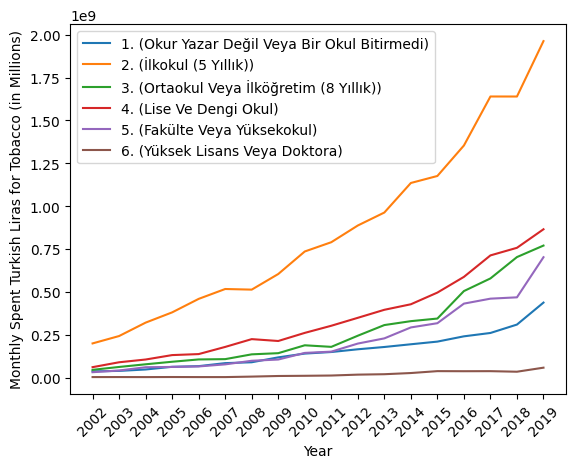

In [14]:
plot_data(df_tutun_toplam_harcama,"Hanehalkı Sorumlusunun Eğitim Durumu",'Yıl','Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)','Year','Monthly Spent Turkish Liras for Tobacco (in Millions)')

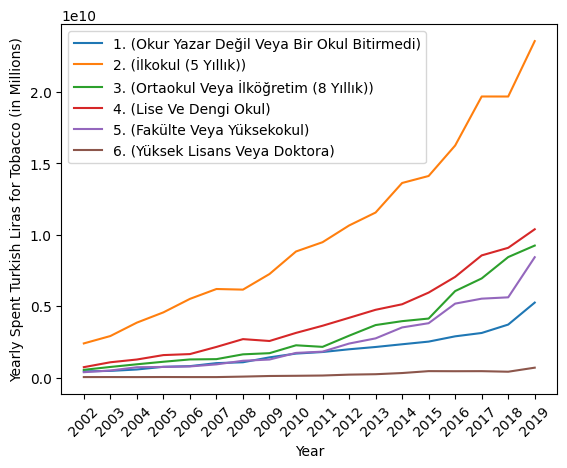

In [15]:
df_tutun_toplam_harcama_yillik = df_tutun_toplam_harcama
df_tutun_toplam_harcama_yillik['Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)'] = df_tutun_toplam_harcama_yillik['Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)'] * 12

plot_data(df_tutun_toplam_harcama_yillik,"Hanehalkı Sorumlusunun Eğitim Durumu",'Yıl','Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)','Year','Yearly Spent Turkish Liras for Tobacco (in Millions)')

Interesting thing is that potentially more wealthy part of the society, people who ghad graduate education are the ones who spend the least amount for tobacco in a year. Moreover, considering the exchange rate and value of TL decreased so that tobacco prices have increased over 20 years and the money that group 6 spend on tobacco did not quite change; it can also be concluded that their usage of tobacco decreased.

We do not see a direct and generalizable relation between education level and the money spend on tobacco though. It is clear that group 2 spends the most but the following groups are very close to each other. Besides, they are not ordered aligned with their education level. 

In [16]:
df_yuzdelik_gelir = pd.read_excel('/content/drive/My Drive/cs210gulnihal/yuzdelik_gelir.xlsx')
df_yuzdelik_gelir

,Yüzde 20'lik gelir dilimleri,Yıl,Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)
0,1,2002,40432745
1,1,2003,57289450
2,1,2004,69158717
3,1,2005,89618410
4,1,2006,106733091
...,...,...,...
85,5,2015,726828739
86,5,2016,828307685
87,5,2017,1056677705
88,5,2018,1069087706


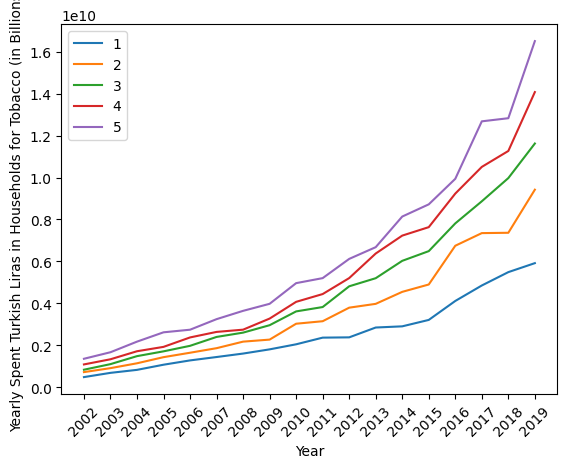

In [17]:
df_yuzdelik_gelir_yillik = df_yuzdelik_gelir
df_yuzdelik_gelir_yillik['Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)'] = df_yuzdelik_gelir_yillik['Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)'] * 12

plot_data(df_yuzdelik_gelir_yillik,"Yüzde 20'lik gelir dilimleri",'Yıl','Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)','Year','Yearly Spent Turkish Liras in Households for Tobacco (in Billions)')

In [18]:
df_is_durumu_istihdam = pd.read_excel('/content/drive/My Drive/cs210gulnihal/ise_gore.xlsx')
df_is_durumu_istihdam

,15+ İş Durumu,Yıl,İstihdam (Bin)
0,"Ücretli, Maaşlı Veya Yevmiyeli",2014,17125
1,"Ücretli, Maaşlı Veya Yevmiyeli",2015,17827
2,"Ücretli, Maaşlı Veya Yevmiyeli",2016,18377
3,"Ücretli, Maaşlı Veya Yevmiyeli",2017,18960
4,"Ücretli, Maaşlı Veya Yevmiyeli",2018,19536
...,...,...,...
103,NaN,2018,2845
104,NaN,2019,2730
105,NaN,2020,2338
106,NaN,2021,2511


In [19]:
df_is_durumu_istihdam.columns

Index(['15+ İş Durumu', 'Yıl', 'İstihdam (Bin)'], dtype='object')

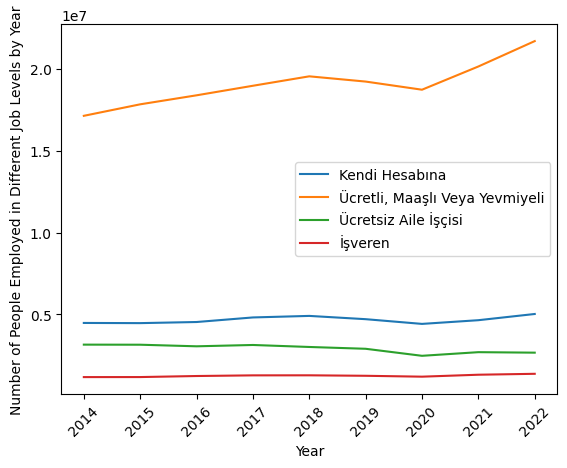

In [20]:
work_situations = ["Kendi Hesabına","Ücretli, Maaşlı Veya Yevmiyeli","Ücretsiz Aile İşçisi","İşveren"]
df_is_durumu_istihdam_binx = df_is_durumu_istihdam
df_is_durumu_istihdam_binx['İstihdam (Bin)'] = df_is_durumu_istihdam_binx['İstihdam (Bin)'] * 1000
df_is_durumu_istihdam_binx = df_is_durumu_istihdam_binx[df_is_durumu_istihdam_binx["15+ İş Durumu"].isin(work_situations)]

plot_data(df_is_durumu_istihdam_binx,"15+ İş Durumu",'Yıl','İstihdam (Bin)','Year','Number of People Employed in Different Job Levels by Year')

In [21]:
df_is_durumu_tutun_harcamasi = pd.read_excel('/content/drive/My Drive/cs210gulnihal/isteki_durumu.xlsx')
df_is_durumu_tutun_harcamasi.head()

,Hanehalkı sorumlusunun işteki durumu,Yıl,Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)
0,Düzenli Ücretli Çalışanlar,2002,141138157
1,Düzenli Ücretli Çalışanlar,2003,174962605
2,Düzenli Ücretli Çalışanlar,2004,226706915
3,Düzenli Ücretli Çalışanlar,2005,267834292
4,Düzenli Ücretli Çalışanlar,2006,323750387


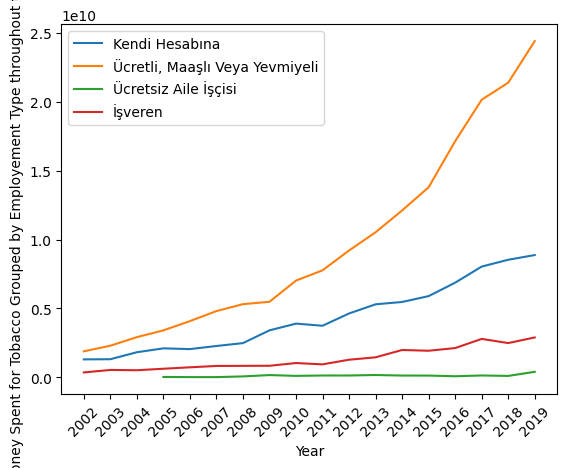

In [22]:
df_is_durumu_tutun_harcamasi_yillik = df_is_durumu_tutun_harcamasi
df_is_durumu_tutun_harcamasi_yillik['Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)'] = df_is_durumu_tutun_harcamasi_yillik['Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)'] * 12
df_is_durumu_tutun_harcamasi_yillik = df_is_durumu_tutun_harcamasi_yillik[df_is_durumu_tutun_harcamasi_yillik["Hanehalkı sorumlusunun işteki durumu"].isin(work_situations)]

plot_data(df_is_durumu_tutun_harcamasi_yillik,"Hanehalkı sorumlusunun işteki durumu",'Yıl','Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)','Year','Money Spent for Tobacco Grouped by Employement Type throughout the Years')


Intersection years: 2014-2019

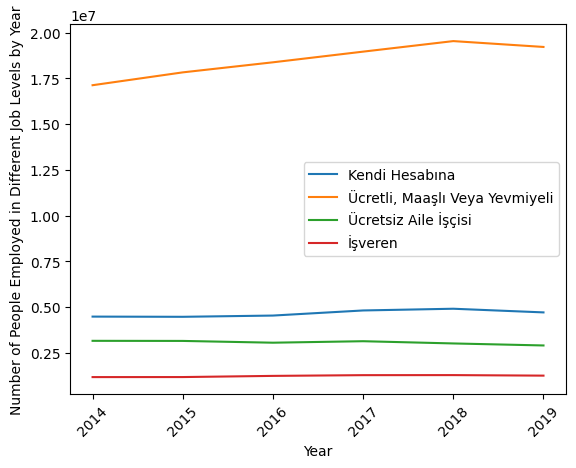

In [23]:
df_is_durumu_istihdam_binx = df_is_durumu_istihdam_binx[(df_is_durumu_istihdam_binx["Yıl"] >= 2014) & (df_is_durumu_istihdam_binx["Yıl"] <= 2019)]

plot_data(df_is_durumu_istihdam_binx,"15+ İş Durumu",'Yıl','İstihdam (Bin)','Year','Number of People Employed in Different Job Levels by Year')

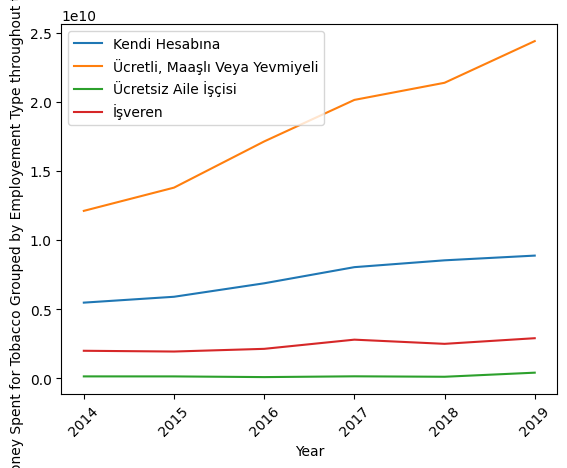

In [24]:
df_is_durumu_tutun_harcamasi_yillik = df_is_durumu_tutun_harcamasi_yillik[(df_is_durumu_tutun_harcamasi_yillik["Yıl"] >= 2014) & (df_is_durumu_tutun_harcamasi_yillik["Yıl"] <= 2019)]

plot_data(df_is_durumu_tutun_harcamasi_yillik,"Hanehalkı sorumlusunun işteki durumu",'Yıl','Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)','Year','Money Spent for Tobacco Grouped by Employement Type throughout the Years')

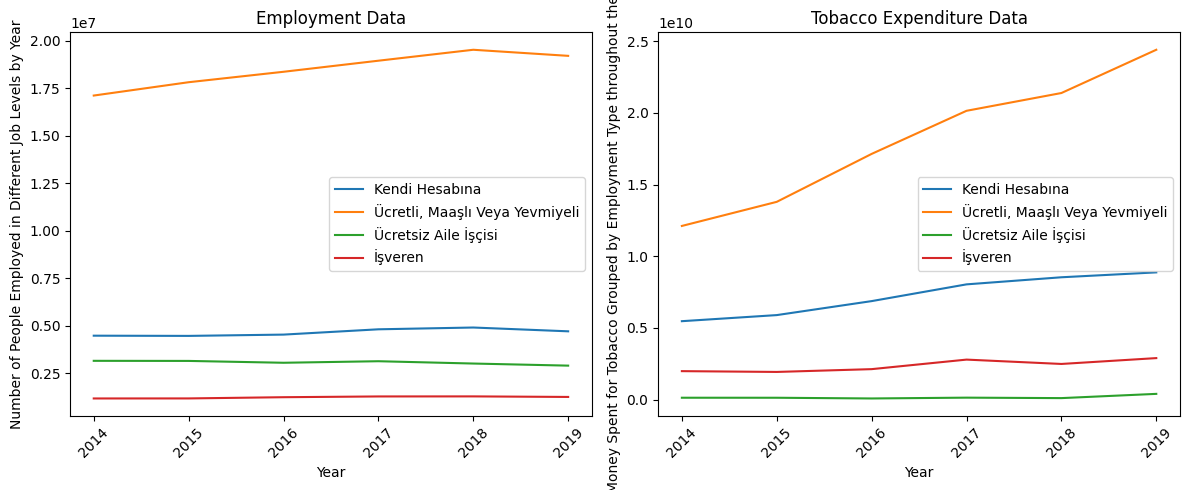

In [25]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the employment data
grouped_data_istihdam = df_is_durumu_istihdam_binx.groupby("15+ İş Durumu")
for group_name, group_data in grouped_data_istihdam:
    ax1.plot(group_data['Yıl'].astype(str), group_data['İstihdam (Bin)'], label=str(group_name))

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of People Employed in Different Job Levels by Year')
ax1.set_title('Employment Data')


ax1.tick_params(axis='x', rotation=45)


ax1.legend()

# Plotting the tobacco expenditure data
grouped_data_tutun_harcamasi = df_is_durumu_tutun_harcamasi_yillik.groupby("Hanehalkı sorumlusunun işteki durumu")
for group_name, group_data in grouped_data_tutun_harcamasi:
    ax2.plot(group_data['Yıl'].astype(str), group_data['Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)'], label=str(group_name))


ax2.set_xlabel('Year')
ax2.set_ylabel('Money Spent for Tobacco Grouped by Employment Type throughout the Years')
ax2.set_title('Tobacco Expenditure Data')

ax2.tick_params(axis='x', rotation=45)

ax2.legend()

plt.tight_layout()


plt.show()


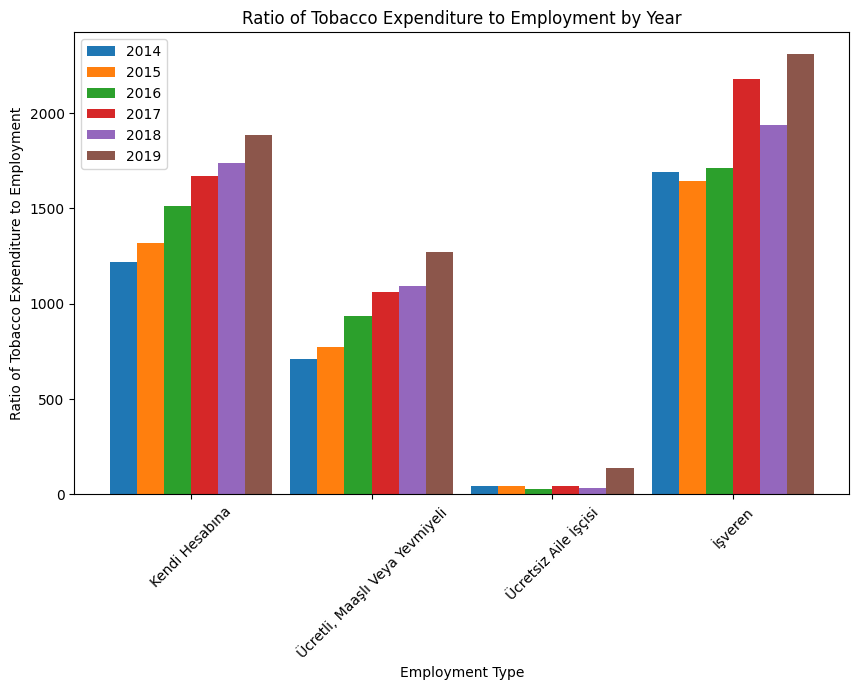

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the average ratio for each year
grouped_data_istihdam = df_is_durumu_istihdam_binx.groupby("15+ İş Durumu")
grouped_data_tutun_harcamasi = df_is_durumu_tutun_harcamasi_yillik.groupby("Hanehalkı sorumlusunun işteki durumu")

years = {2014: {}, 2015: {}, 2016: {}, 2017: {}, 2018: {}, 2019: {}}

for employement, group_data_istihdam in grouped_data_istihdam:
    group_data_tutun_harcamasi = grouped_data_tutun_harcamasi.get_group(employement)
    for year in group_data_istihdam["Yıl"].unique():
        yearly_group_data_tutun_harcamasi = group_data_tutun_harcamasi[group_data_tutun_harcamasi["Yıl"] == year]
        yearly_group_data_istihdam = group_data_istihdam[group_data_istihdam["Yıl"] == year]
        ratio = yearly_group_data_tutun_harcamasi['Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)'].sum() / yearly_group_data_istihdam['İstihdam (Bin)'].sum()
        years[year][employement] = ratio

# Extract employment types and ratios for each year
employments = list(grouped_data_istihdam.groups.keys())
ratios_by_year = {year: [years[year].get(employment, 0) for employment in employments] for year in years}

# Plotting the data for each year
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15  
bar_positions = np.arange(len(employments))

for i, (year, ratios) in enumerate(ratios_by_year.items()):
    ax.bar(bar_positions + i * bar_width, ratios, width=bar_width, label=str(year))


ax.set_xlabel('Employment Type')
ax.set_ylabel('Ratio of Tobacco Expenditure to Employment')
ax.set_title('Ratio of Tobacco Expenditure to Employment by Year')


ax.set_xticks(bar_positions + (len(ratios_by_year) - 1) * bar_width / 2)
ax.set_xticklabels(employments, rotation=45)


ax.legend()

plt.show()


In [27]:
tobacco_prices = pd.read_excel('/content/drive/My Drive/cs210gulnihal/sigara_fiyatlari.xlsx')
tobacco_prices

,Yıl,01-Ocak,02-Şubat,03-Mart,04-Nisan,05-Mayıs,06-Haziran,07-Temmuz,08-Ağustos,09-Eylül,10-Ekim,11-Kasım,12-Aralık
0,2013,7.4865,7.5381,7.5381,7.5381,7.5381,7.5381,7.5275,7.5275,7.5275,7.4731,7.4303,7.2552
1,2014,7.7559,7.7602,7.7602,7.7602,7.7484,7.7436,7.8694,7.8272,7.7494,7.7494,7.7494,7.7494
2,2015,8.3115,8.2724,8.2724,8.2724,8.2724,8.2724,8.3759,8.4039,8.4273,8.4273,8.4273,8.4273
3,2016,9.1165,9.2011,9.2011,9.2011,9.2011,9.2011,9.8582,10.2011,10.2011,10.2011,10.2011,10.9469
4,2017,11.2521,11.2521,11.2521,11.2521,11.2521,11.2521,11.2521,11.2521,11.2521,11.2521,11.2521,11.2521
5,2018,11.2045,11.2045,11.2045,11.2045,11.2045,11.2045,11.2045,11.2456,11.2456,11.2456,11.2456,11.2456
6,2019,11.2290,11.2290,11.2290,12.0966,13.1973,13.1989,13.2089,15.9092,16.2082,16.2082,16.2082,16.2082
7,2020,16.2427,16.0429,16.0429,16.0429,16.1378,16.2625,16.2650,16.2710,16.2746,16.2746,16.2746,16.2746
8,2021,15.5156,15.5177,15.5199,15.6324,15.6324,15.6324,15.6324,15.6324,15.6324,16.6303,16.6303,18.6067
9,2022,23.0706,23.0706,24.0429,25.0563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
tobacco_prices.columns

Index(['Yıl', '01-Ocak', '02-Şubat', '03-Mart', '04-Nisan', '05-Mayıs',
       '06-Haziran', '07-Temmuz', '08-Ağustos', '09-Eylül', '10-Ekim',
       '11-Kasım', '12-Aralık'],
      dtype='object')

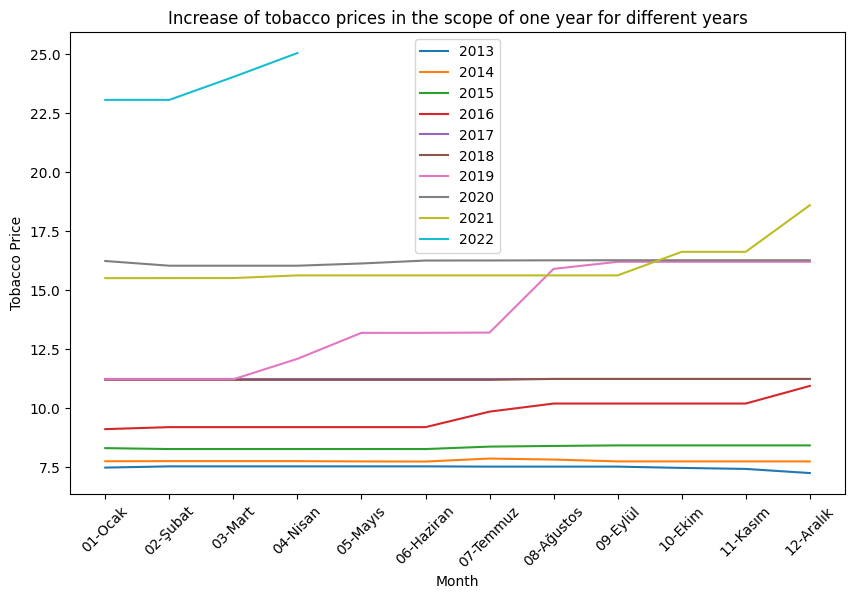

In [29]:


tobacco_prices['Year'] = tobacco_prices['Yıl']


tobacco_prices.set_index('Year', inplace=True)


months = tobacco_prices.columns[1:]

plt.figure(figsize=(10, 6))

# Iterate over each year and plot the tobacco prices for each month
for year, data in tobacco_prices.groupby('Year'):
    prices = data.iloc[:, 1:].values.ravel()
    plt.plot(months, prices, label=str(year))

plt.xlabel('Month')
plt.ylabel('Tobacco Price')
plt.title('Increase of tobacco prices in the scope of one year for different years')


plt.xticks(rotation=45)


plt.legend()


plt.show()


In [30]:
tobacco_prices.columns

Index(['Yıl', '01-Ocak', '02-Şubat', '03-Mart', '04-Nisan', '05-Mayıs',
       '06-Haziran', '07-Temmuz', '08-Ağustos', '09-Eylül', '10-Ekim',
       '11-Kasım', '12-Aralık'],
      dtype='object')

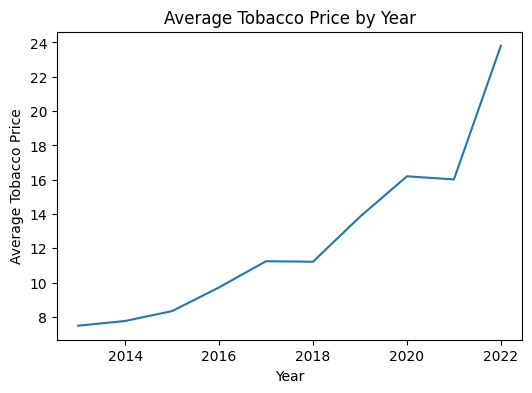

In [31]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate the average tobacco prices by year
average_prices_by_year = tobacco_prices.iloc[:, 1:].mean(axis=1)


years = tobacco_prices['Yıl'].tolist()


plt.figure(figsize=(6, 4))
plt.plot(years, average_prices_by_year)


plt.xlabel('Year')
plt.ylabel('Average Tobacco Price')
plt.title('Average Tobacco Price by Year')


plt.show()


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

cigarette_prices = tobacco_prices
cigarette_prices["Price"] = cigarette_prices.iloc[:, 1:].mean(axis=1) #mean of yearly price

df_is_durumu_tutun_harcamasi['Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)'] = df_is_durumu_tutun_harcamasi['Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)'] * 12

yearly_total_spent = df_is_durumu_tutun_harcamasi.groupby("Yıl")['Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)'].sum()

yearly_total_spent = yearly_total_spent.reset_index()

yearly_total_spent


,Yıl,Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)
0,2002,74244705120
1,2003,92627510400
2,2004,118497365712
3,2005,139749786144
4,2006,161800711200
5,2007,188850436848
6,2008,208218458592
7,2009,228736986480
8,2010,284007221856
9,2011,302706850320


In [33]:
yearly_total_spent['Year'] = yearly_total_spent['Yıl']

yearly_total_spent.set_index('Year', inplace=True)

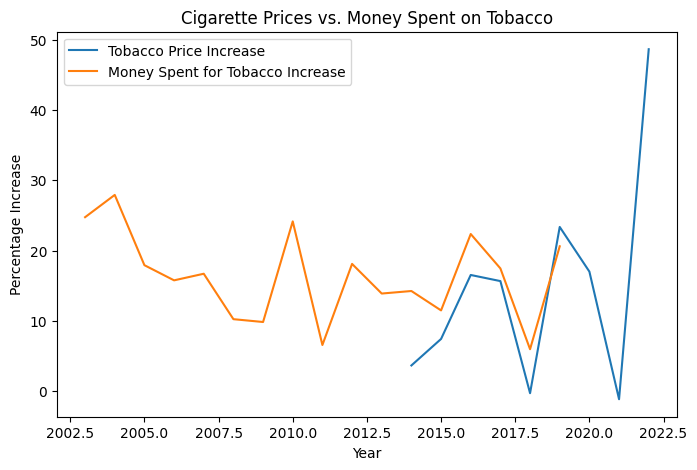

Correlation: 0.8874053104732775


In [34]:
# Calculating the percentage increase in cigarette prices and money spent on tobacco
cigarette_price_increase = (cigarette_prices['Price'] - cigarette_prices['Price'].shift(1)) / cigarette_prices['Price'].shift(1) * 100
money_spent_increase = (yearly_total_spent['Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)'] - yearly_total_spent['Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)'].shift(1)) / yearly_total_spent['Toplam Hanehalkı Tüketim Harcaması (Tl/Ay)'].shift(1) * 100

# Plotting the time series of percentage increases
plt.figure(figsize=(8, 5))
plt.plot(cigarette_prices['Yıl'], cigarette_price_increase, label='Tobacco Price Increase')
plt.plot(yearly_total_spent['Yıl'], money_spent_increase, label='Money Spent for Tobacco Increase')


plt.xlabel('Year')
plt.ylabel('Percentage Increase')
plt.title('Cigarette Prices vs. Money Spent on Tobacco')


plt.legend()


plt.show()

# Calculating the correlation coefficient
correlation = cigarette_price_increase.corr(money_spent_increase)
print('Correlation:', correlation)

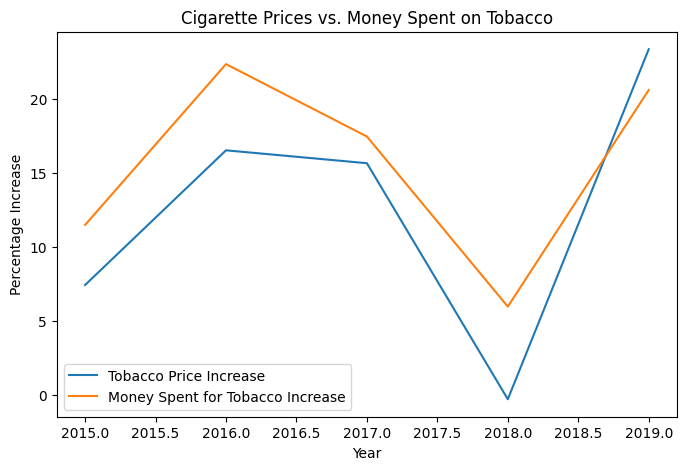

Correlation: 0.9350885565137862


In [35]:
start_year = 2015
end_year = 2019
filtered_cigarette_price_increase = cigarette_price_increase[(cigarette_prices.index >= start_year) & (cigarette_prices.index <= end_year)]
filtered_money_spent_increase = money_spent_increase[(money_spent_increase.index >= start_year) & (money_spent_increase.index <= end_year)]

plt.figure(figsize=(8, 5))
plt.plot(filtered_cigarette_price_increase.index, filtered_cigarette_price_increase, label='Tobacco Price Increase')
plt.plot(filtered_money_spent_increase.index, filtered_money_spent_increase, label='Money Spent for Tobacco Increase')


plt.xlabel('Year')
plt.ylabel('Percentage Increase')
plt.title('Cigarette Prices vs. Money Spent on Tobacco')


plt.legend()


plt.show()

correlation = filtered_cigarette_price_increase.corr(filtered_money_spent_increase)
print('Correlation:', correlation)